

The dataset contains 43 different classes of images.

Classes are as listed below:

( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection') (12, b'Priority road')
(13, b'Yield') (14, b'Stop') (15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
(18, b'General caution') (19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right') (21, b'Double curve')
(22, b'Bumpy road') (23, b'Slippery road')
(24, b'Road narrows on the right') (25, b'Road work')
(26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
(29, b'Bicycles crossing') (30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits') (33, b'Turn right ahead')
(34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
(37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
(40, b'Roundabout mandatory') (41, b'End of no passing')
(42, b'End of no passing by vehicles over 3.5 metric tons')

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

36

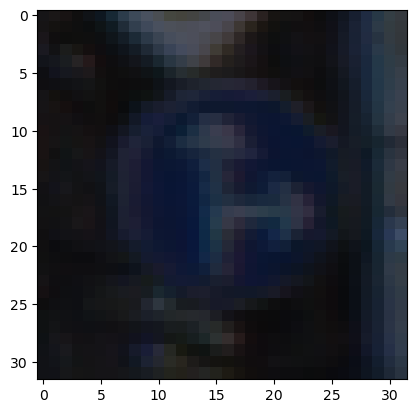

In [9]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [10]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [12]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

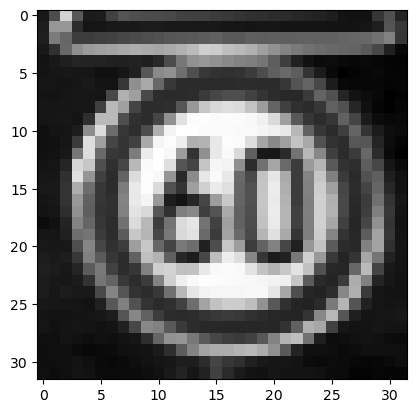

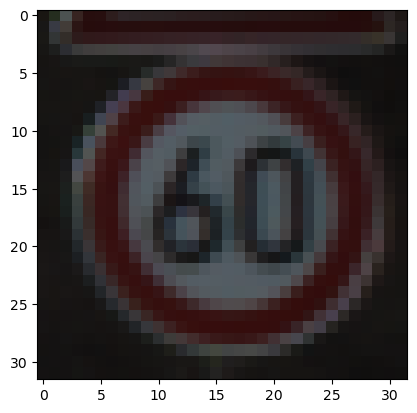

In [14]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [15]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [16]:
image_shape = X_train_gray[i].shape

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder




label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_validation_encoded = label_encoder.transform(y_validation)

In [30]:
cnn_model = Sequential()

# Add the first convolutional layer
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))

# Add the first average pooling layer with pool size
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Add the second average pooling layer with pool size
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the output to feed into dense layers
cnn_model.add(Flatten())

# Add a dense layer with 120 units
cnn_model.add(Dense(units=120, activation='relu'))

# Add a dense layer with 84 units
cnn_model.add(Dense(units=84, activation='relu'))


num_classes = len(label_encoder.classes_)
cnn_model.add(Dense(units=num_classes, activation='softmax'))




In [32]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [34]:
history = cnn_model.fit(
    X_train_gray_norm,
    y_train_encoded,
    batch_size=500,
    epochs=50,
    verbose=1,
    validation_data=(X_validation_gray_norm, y_validation_encoded)
)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.1078 - loss: 3.4345 - val_accuracy: 0.3540 - val_loss: 2.5947
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4581 - loss: 1.9668 - val_accuracy: 0.6125 - val_loss: 1.3457
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6978 - loss: 1.0516 - val_accuracy: 0.7068 - val_loss: 0.9782
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7950 - loss: 0.7343 - val_accuracy: 0.7413 - val_loss: 0.8392
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8451 - loss: 0.5704 - val_accuracy: 0.7755 - val_loss: 0.7342
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8695 - loss: 0.4746 - val_accuracy: 0.8084 - val_loss: 0.6522
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8943 - loss: 0.4004 - val_accuracy: 0.8163 - val_loss: 0.6190
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9119 - loss: 0.3498 - val_accuracy: 0.8279 - 

In [36]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8716


In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

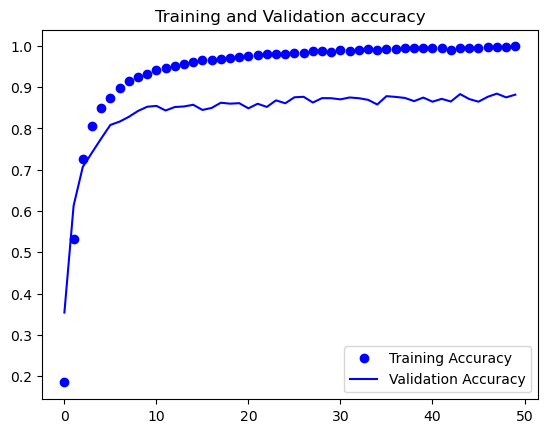

In [42]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

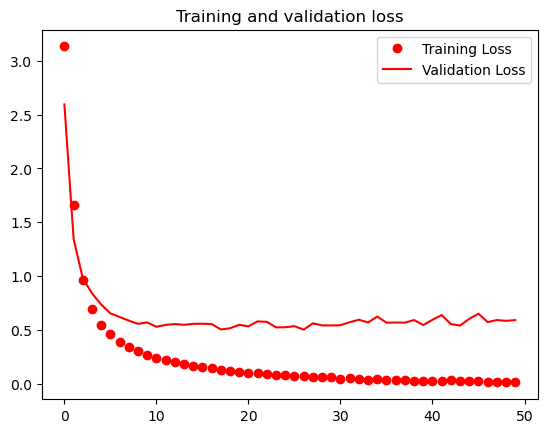

In [44]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test
predicted_classes 


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


array([[6.22641794e-36, 0.00000000e+00, 0.00000000e+00, ...,
        2.77282740e-14, 8.05502765e-22, 1.08568980e-28],
       [8.22530203e-17, 1.00000000e+00, 2.43667551e-11, ...,
        8.74157721e-23, 5.22438950e-33, 1.00105791e-29],
       [2.54881330e-36, 1.14873468e-29, 8.35853897e-30, ...,
        4.80609799e-30, 5.34317074e-23, 0.00000000e+00],
       ...,
       [4.66866586e-05, 3.66629392e-04, 5.11912276e-07, ...,
        1.38365231e-13, 6.08946209e-08, 1.31342615e-09],
       [1.08622265e-13, 1.46325765e-04, 5.09463775e-04, ...,
        2.10630537e-06, 8.52831583e-10, 1.01281534e-08],
       [4.42942463e-14, 8.98050731e-11, 1.22340834e-05, ...,
        1.68690715e-08, 6.03678253e-24, 3.67891841e-20]], dtype=float32)

In [54]:
y_test


array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [58]:
predicted_classes = np.argmax(predicted_classes, axis=1)

print("Predicted classes:", predicted_classes)

Predicted classes: [16  1 38 ...  8  7 10]


<Axes: >

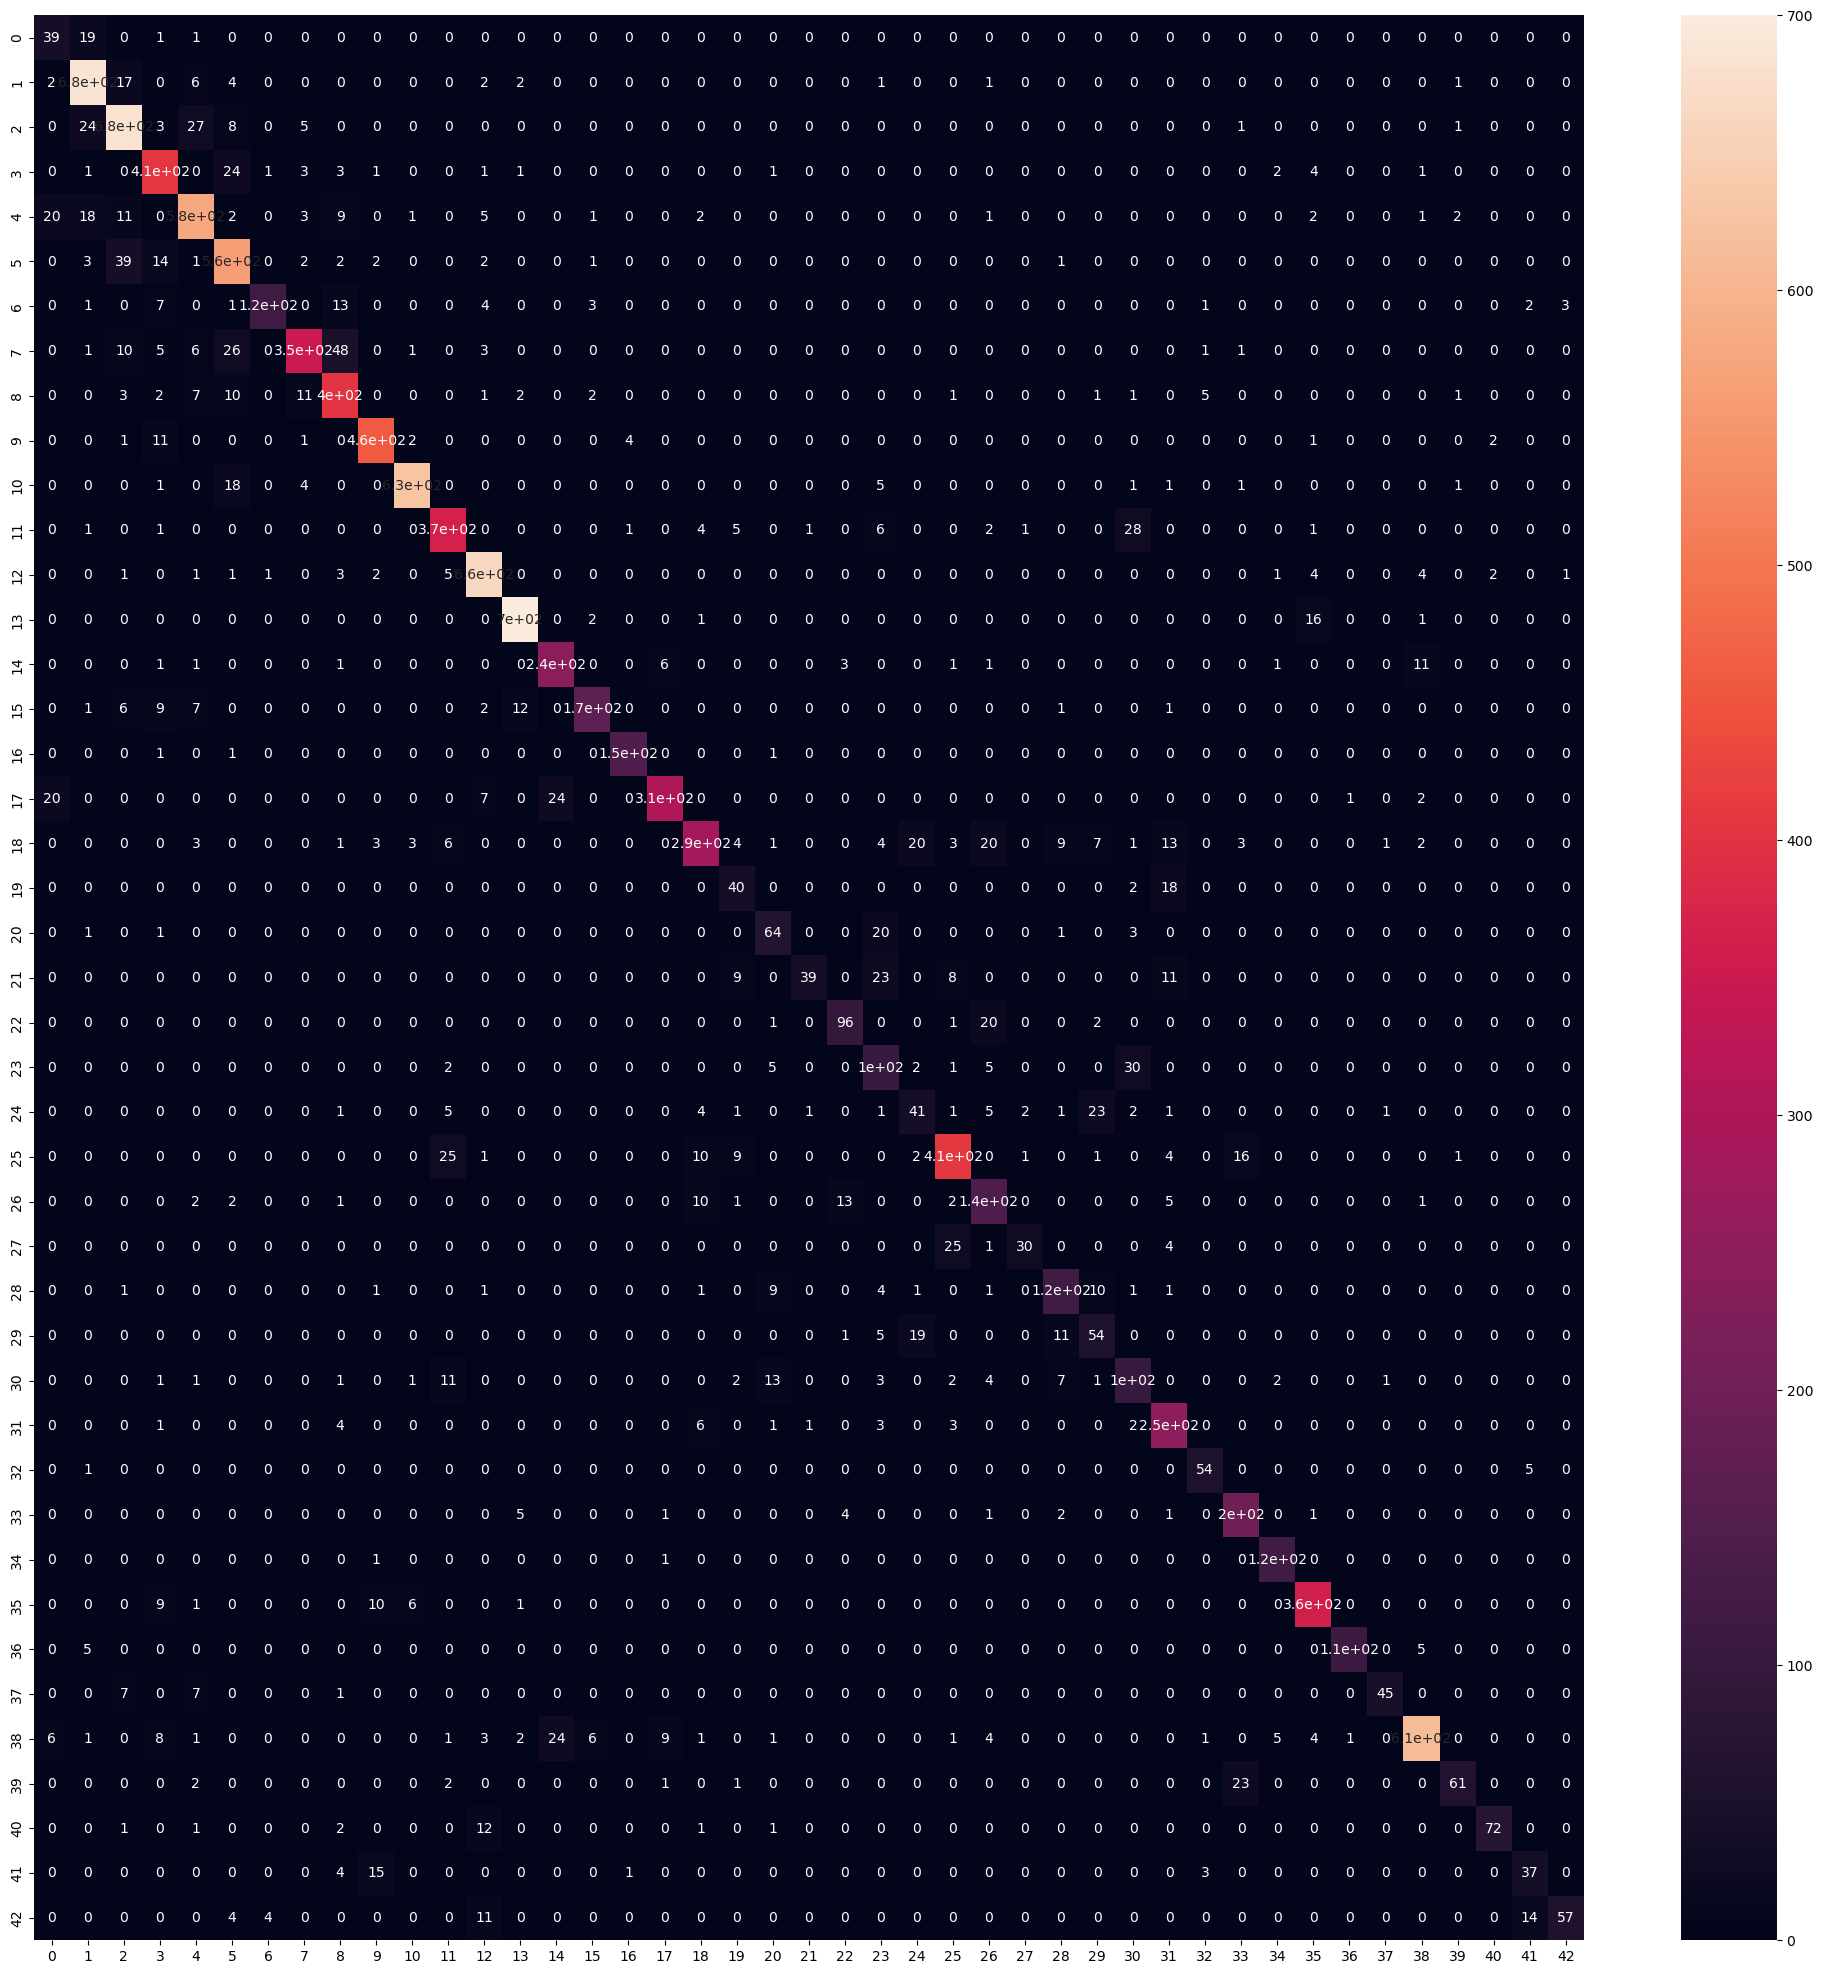

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

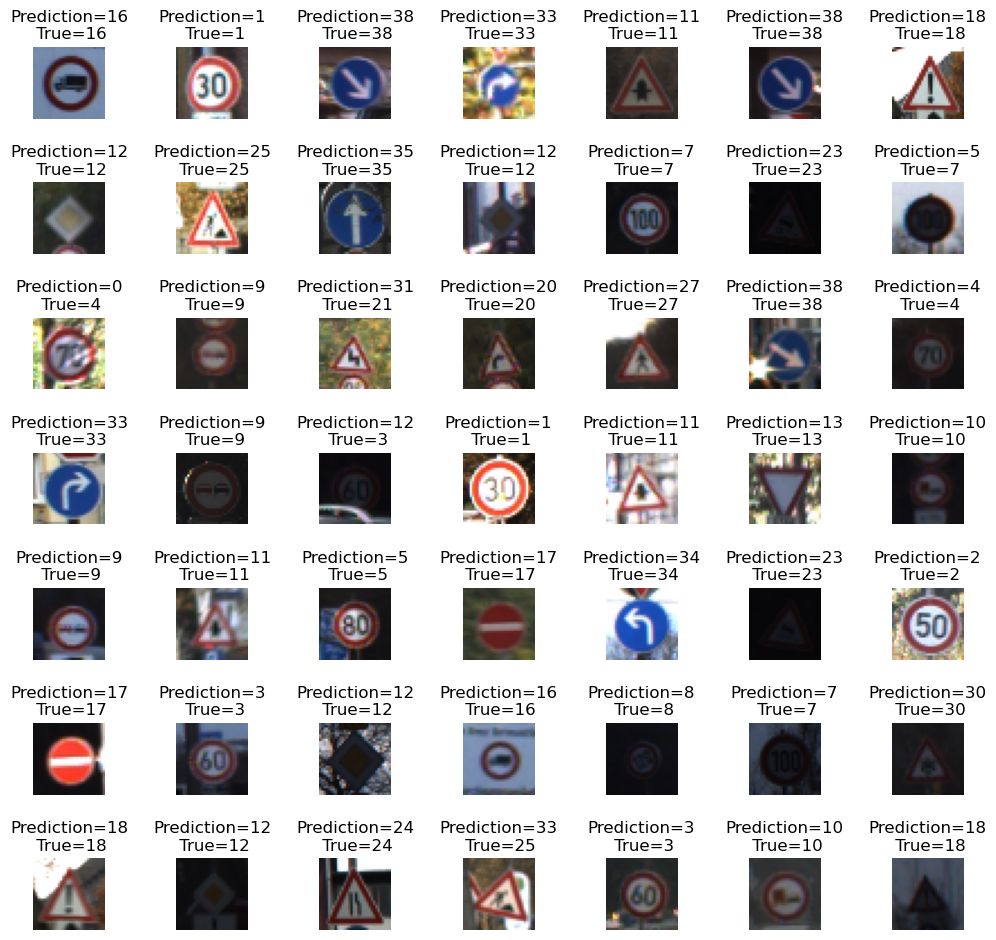

In [62]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)